In [21]:
import cv2
import time
import numpy as np


def threshImageBg():
    # Load the image
    image = cv2.imread("/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/report/heatmap.png")

    # Define the white color range in BGR format
    lower_white = np.array([200, 200, 200], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    # Create a mask of white pixels within the defined range
    mask = cv2.inRange(image, lower_white, upper_white)

    # Invert the mask to select non-white pixels
    mask_inv = cv2.bitwise_not(mask)

    # Apply the mask to remove white pixels
    result = cv2.bitwise_and(image, image, mask=mask_inv)

    # Save the result image
    cv2.imwrite("/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/report/heatmap1.jpg", result)


# ADD Images
def addImages():
    base_image = cv2.imread("/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/test_images/grocery.jpg")
    threshImageBg()
    overlay_image = cv2.imread("/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/report/heatmap1.jpg")
    
    # Resize the overlay image to match the dimensions of the base image
    overlay_image = cv2.resize(overlay_image, (base_image.shape[1], base_image.shape[0]))

    # Convert the images to grayscale
    base_gray = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
    overlay_gray = cv2.cvtColor(overlay_image, cv2.COLOR_BGR2GRAY)

    # Create a mask by thresholding the overlay image
    _, mask = cv2.threshold(overlay_gray, 15, 255, cv2.THRESH_BINARY)

    # Invert the mask
    mask_inv = cv2.bitwise_not(mask)

    # Use bitwise operations to apply the mask and overlay the images
    base_masked = cv2.bitwise_and(base_image, base_image, mask=mask_inv)
    overlay_masked = cv2.bitwise_and(overlay_image, overlay_image, mask=mask)
    result = cv2.add(base_masked, overlay_masked)

    # Save the resulting image
    cv2.imwrite("/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/report/result_image.jpg", result)
    
if __name__ == '__main__':
    addImages()

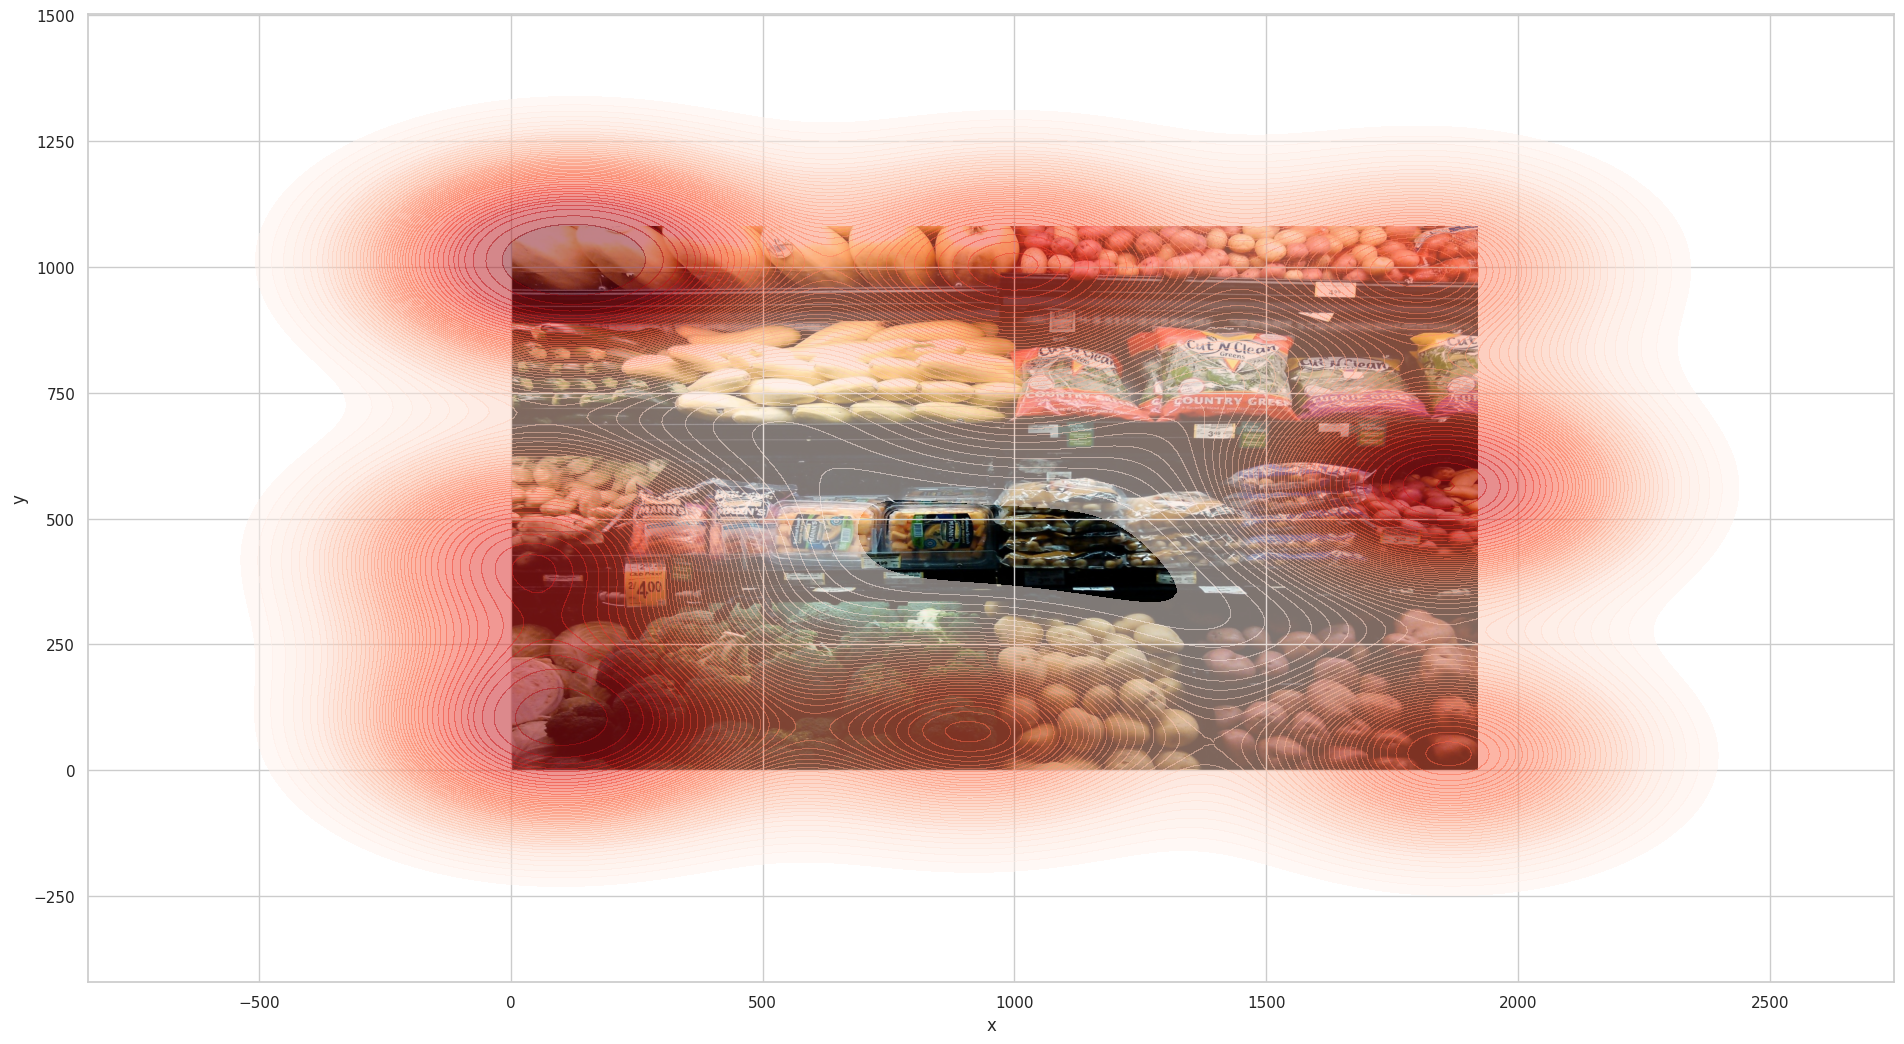

In [42]:
import matplotlib.pyplot as plt
import dbscan_lib as dbs
import seaborn as sns

def test(self):
    img = np.asarray(Image.open('/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/test_images/grocery.jpg'))
    #obj = dbs.dbscanAlgo()
    #obj.dfHandling()

    fig, ax = plt.subplots()
    ax.imshow(img, extent = [0, 1920, 0, 1080])
    sns.kdeplot(data = self.df, x = "x", y = "y", cmap = "Reds", common_norm=False, levels=50, fill = True, alpha = .5)
    plt.show()

/tmp/ipykernel_19802/1824712870.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['x'], df['y'], cmap=cm, color="#ebb734")


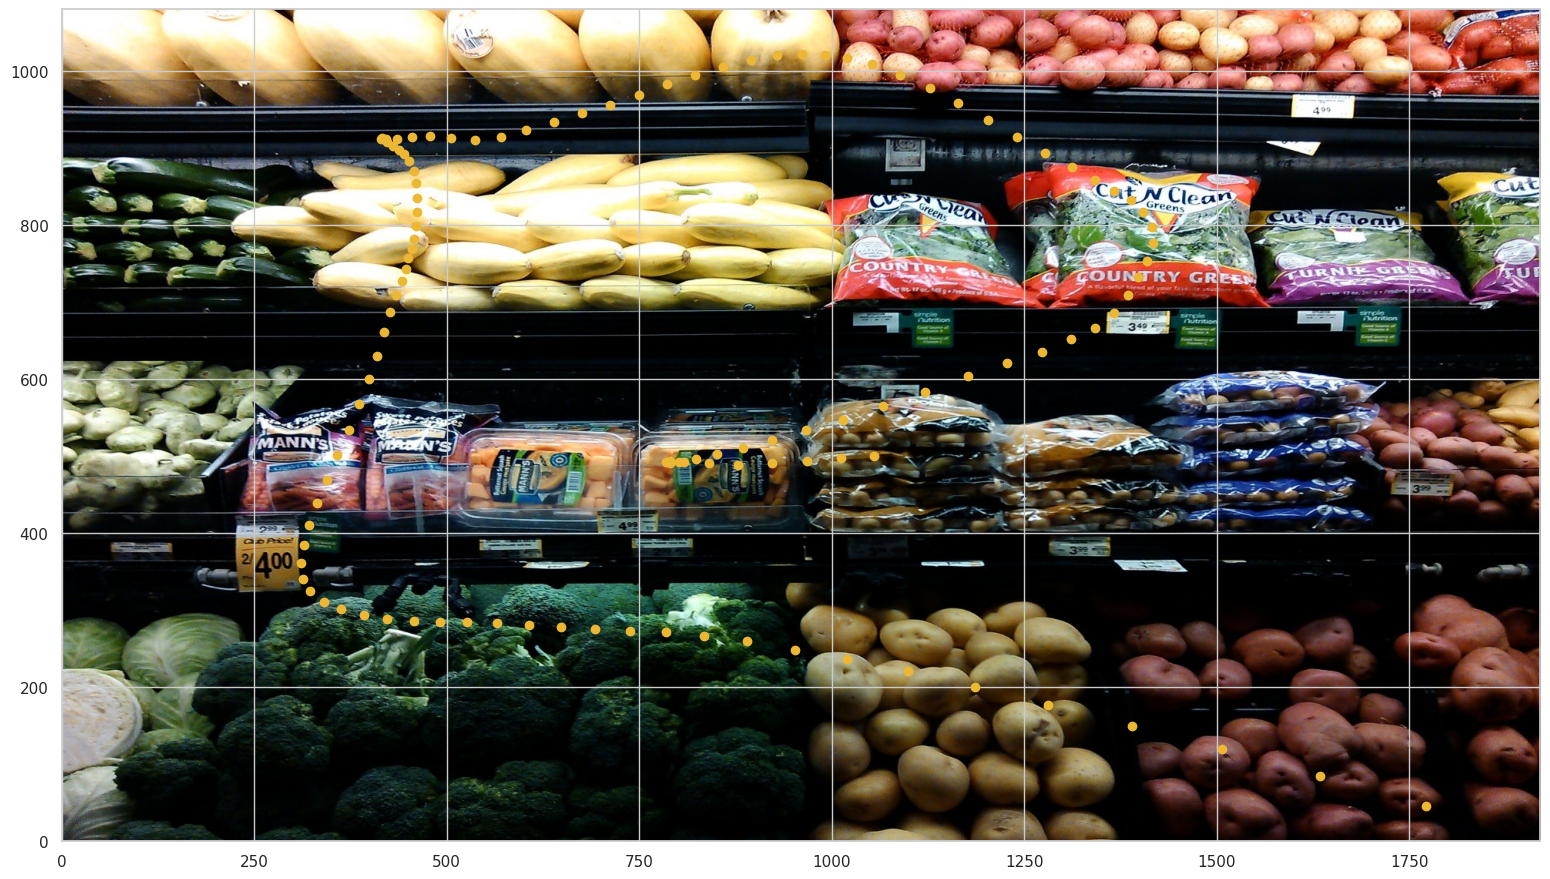

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
import pandas as pd
import numpy as np

df  = pd.read_csv('/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/dataset/gaze_points.csv')
img = np.asarray(Image.open('/home/nata-brain/camera_ws/src/EyeHeadTrack/vision/test_images/grocery.jpg'))

fig, ax = plt.subplots()
ax.imshow(img, extent = [0, 1920, 0, 1080])
plt.scatter(df['x'], df['y'], cmap=cm, color="#ebb734")
plt.show()

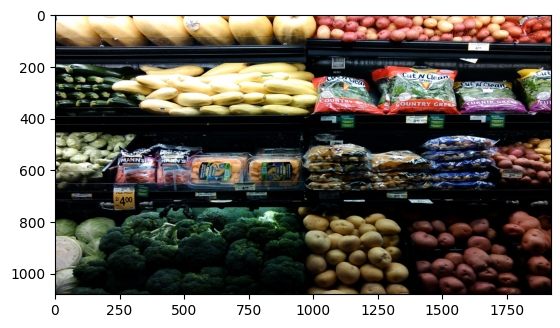

In [8]:
imgplot = plt.imshow(img)
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])